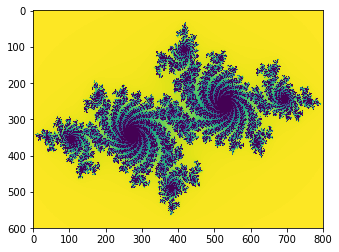

In [3]:
A = np.zeros([600,800])
for x in range(800):
    for y in range(600):
        zx=1.5*(x-800/2)/(0.5*1*800)
        zy=1.0*(y-600/2)/(0.5*1*600)
        i=255
        t=True
        while t==True:
            if zx*zx+zy*zy>=4 or i<=1:
                t=False
            a=zx*zx-zy*zy-0.7
            zy=2.0*zx*zy+0.27015
            zx=a
            i=i-1
        A[y][x]=i


plt.imshow(A)
plt.show()


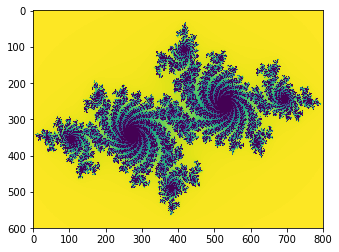

In [115]:
y_axis_lim=600
x_axis_lim=800
resolution=225

def generate_data(A, resolution,zx,zy):
    initial_cond=True
    while initial_cond==True:
        zx_squared=zx*zx
        zy_squared=zy*zy
        if zx_squared+zy_squared>=4 or resolution<=1:
            initial_cond=False
        a=zx_squared-zy_squared-0.7
        zy=2.0*zx*zy+0.27015
        zx=a
        resolution -= 1

    A[y][x]=resolution

def plot_data(y_axis_lim,x_axis_lim,resolution):
    A = np.zeros([y_axis_lim,x_axis_lim])
    
    for x_point in range(x_axis_lim):
        for y_point in range(y_axis_lim):
            zx=1.5*(x-x_axis_lim/2)/(0.5*x_axis_lim)
            zy=1.0*(y-y_axis_lim/2)/(0.5*y_axis_lim)
            
            generate_data(A,resolution,zx,zy)
            
plt.imshow(A)
plt.savefig('Myplot.png') #the order matters
plt.show()
        


    
    
plot_data(y_axis_lim,x_axis_lim,resolution)

putting everything into a class

In [6]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [107]:
# %%writefile Julia.py

class julia(object):
    
    def __init__(self, y_axis_lim, x_axis_lim, resolution):
        self.y_axis_lim=y_axis_lim
        self.x_axis_lim=x_axis_lim
        self.resolution=resolution

    def generate_data(self, A, x, y, resolution,zx,zy):
        initial_cond=True
        
        while initial_cond==True:
            zx_squared=zx*zx
            zy_squared=zy*zy
            if zx_squared+zy_squared>=4 or resolution<=1:
                initial_cond=False
            a=zx_squared-zy_squared-0.7
            zy=2.0*zx*zy+0.27015
            zx=a
            resolution -= 1

        A[y][x]=resolution
        

    def plot_data(self):
        y_axis_lim=self.y_axis_lim
        x_axis_lim=self.x_axis_lim
        resolution=self.resolution
        A = np.zeros([y_axis_lim,x_axis_lim])   
        
        for x in range(x_axis_lim):
            for y in range(y_axis_lim):
                zx=1.5*(x-x_axis_lim/2)/(0.5*x_axis_lim)
                zy=1.0*(y-y_axis_lim/2)/(0.5*y_axis_lim)

                self.generate_data(A, x, y, resolution, zx, zy)
                
        plt.imshow(A)
        plt.savefig('Myplot11.png') #the order matters
        plt.show()

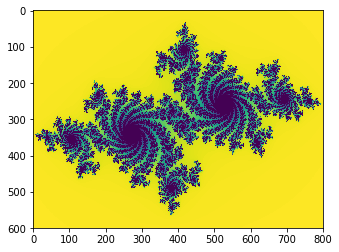

In [108]:
TEST=julia(600,800,225)
TEST.plot_data()

Adding argparse

In [103]:
%%writefile Julia.py

from argparse import ArgumentParser
from matplotlib import pyplot as plt
import numpy as np

class julia(object):
    
    def __init__(self, y_axis_lim, x_axis_lim, resolution):
        self.y_axis_lim=y_axis_lim
        self.x_axis_lim=x_axis_lim
        self.resolution=resolution

    def generate_data(self, A, x, y, resolution,zx,zy):
        initial_cond=True
        
        while initial_cond==True:
            zx_squared=zx*zx
            zy_squared=zy*zy
            if zx_squared+zy_squared>=4 or resolution<=1:
                initial_cond=False
            a=zx_squared-zy_squared-0.7
            zy=2.0*zx*zy+0.27015
            zx=a
            resolution -= 1

        A[y][x]=resolution
        

    def plot_data(self):
        y_axis_lim=self.y_axis_lim
        x_axis_lim=self.x_axis_lim
        resolution=self.resolution
        A = np.zeros([y_axis_lim,x_axis_lim])   
        
        for x in range(x_axis_lim):
            for y in range(y_axis_lim):
                zx=1.5*(x-x_axis_lim/2)/(0.5*x_axis_lim)
                zy=1.0*(y-y_axis_lim/2)/(0.5*y_axis_lim)

                self.generate_data(A, x, y, resolution, zx, zy)
                
        plt.imshow(A)
        plt.savefig('Myplot11.png') #the order matters
        plt.show()

         
          
  
        
if __name__ == "__main__":
    parser = ArgumentParser(description="Julia Pattern")
    parser.add_argument('y_axis_limit', type=int)
    parser.add_argument('x_axis_limit', type=int)
    parser.add_argument('resolution', type=int)
    arguments = parser.parse_args()
    #nargs='?' allows to use a default value if no arguments are given and const gives the dafault
    #value and type make sure the input are integers
    
    initial=julia(arguments.y_axis_limit, arguments.x_axis_limit, arguments.resolution)
    initial.plot_data()
    

Overwriting Julia.py


In [104]:
!python Julia.py 600 800 225

Figure(640x480)


In [80]:
#after putting it in argparse
#if name error put argument in the function
#if still not getting it

'C:\\Users\\Kavin\\Desktop\\MSci Physics, UCL\\Year 4 Physics\\Research Software with Python\\2018 Past Paper\\refactoring_1'